# SVM KD Classifier

In [9]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocessing import load_data
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle as pkl
from sklearn import svm
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve

# Load data
x_train, x_test, y_train, y_test = load_data.load(one_hot=False)

In [10]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [11]:
# Fit Linear SVM model 
clf = svm.SVC(probability=True)
clf.fit(x_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
# Make predictions
y_pred = clf.predict(x_test) # binary prediction
y_prob = clf.predict_proba(x_test)[:,1] # predicted probabilities

In [13]:
# Evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.937086092715
Precision:  0.945098039216
Recall:  0.979674796748
F1 Score:  0.962075848303
ROC AUC:  0.973069105691


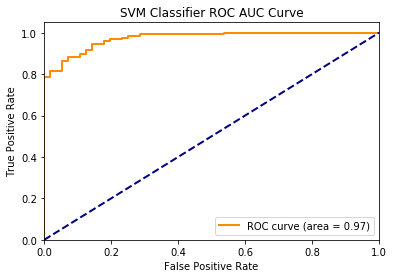

In [15]:
# Plot ROC Curve
roc = roc_curve(y_test, y_prob)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()